Author : Shivam Chavan

Task - 1 : Prediction using Supervised ML (Level - Beginner)

Perform exploratory Data Analysis on dataset 'Student' To Predict the percentage of marks of the students based on the number of hours they studied.

Importing Libraries.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
sns.set()

Loading the Dataset.


In [55]:
df = pd.read_csv('http://bit.ly/w-data')
df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Data Exploration

In [56]:
df.shape

(25, 2)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [58]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting a graph to check the co-relation between the two variables.


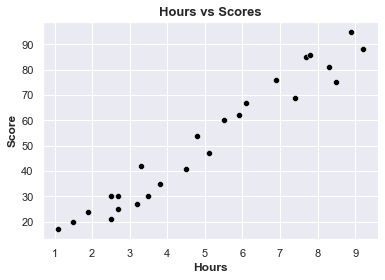

In [59]:
sns.scatterplot(x = df["Hours"],
            y = df["Scores"],
            color = "black")
plt.title("Hours vs Scores", fontsize =13,fontweight = "bold")  
plt.xlabel("Hours",fontweight = "bold")  
plt.ylabel("Score",fontweight = "bold")  
plt.show()

From the above graph, we can see that there is a correlation between the variables namely 'Scores' and 'Hours'.

Plotting a regression graph to confirm the co-relation.

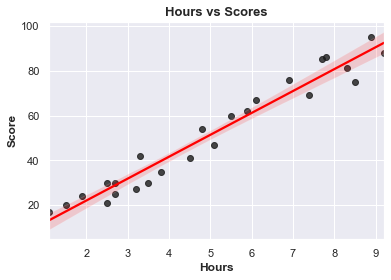

In [60]:
sns.regplot(x = df["Hours"],
            y = df["Scores"],
            data= df,
            scatter_kws = {'color' : "k"},
            line_kws = {'color': "red"})
plt.xlabel("Hours",fontweight = "bold")
plt.ylabel("Score",fontweight = "bold")
plt.title("Hours vs Scores", fontsize =13, fontweight ="bold")
plt.show()

Co-relation confirmed.

Training the Model.

1.Splitting the Data.

In [61]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

2.Fitting data into the model.


In [62]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained")

Model Trained


Making Predictions.

In [63]:
print(val_X)
pred_y = regression.predict(val_X)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


Actual values and Predicted Values.


In [64]:
df1= pd.DataFrame({'Actual_Values': val_y, 'Predicted_Values': pred_y})  
print(df1)

   Actual_Values  Predicted_Values
0             20         16.844722
1             27         33.745575
2             69         75.500624
3             30         26.786400
4             62         60.588106
5             35         39.710582
6             24         20.821393


Visual Representation.

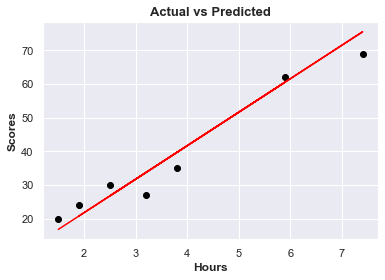

In [65]:
plt.scatter(x=val_X, y=val_y, color='Black')
plt.plot(val_X, pred_y, color='Red')
plt.title("Actual vs Predicted", fontsize=13, fontweight = "bold")
plt.ylabel("Scores", fontweight = "bold")
plt.xlabel("Hours", fontweight = "bold")
plt.show()

Evaluating the Model.

In [66]:
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [67]:
hours = [9.25]
score = regression.predict([hours])
print("Score = {}".format(score))

Score = [93.89272889]
